In [1]:
import librosa
import librosa.display
import IPython.display
import numpy as np

In [2]:
y, sr = librosa.load('audio/mom/mom6.wav')
len(y)/sr

5.0

In [3]:
IPython.display.Audio(data=y, rate=sr)

In [4]:
y_shift = librosa.effects.pitch_shift(y, sr, 7)

IPython.display.Audio(data=y_shift, rate=sr)

In [5]:
y_slow = librosa.effects.time_stretch(y, 0.5)

IPython.display.Audio(data=y_slow, rate=sr)

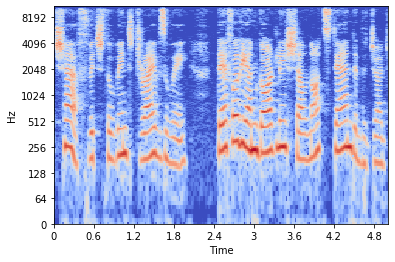

In [6]:
D = librosa.stft(y)
yDb = librosa.amplitude_to_db(abs(D))
librosa.display.specshow(yDb, sr=sr, x_axis='time', y_axis='log')

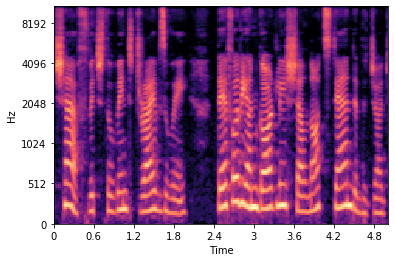

In [7]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')

In [8]:
np.arange(1,5)

array([1, 2, 3, 4])

In [9]:
mfccs = librosa.feature.mfcc(y, sr=sr)

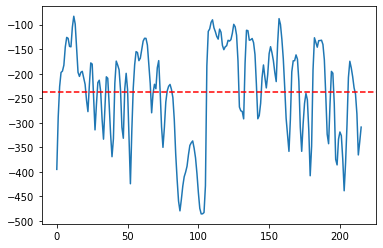

In [10]:
import seaborn as sns
ax = sns.lineplot(data=mfccs[0])
ax.axhline(mfccs[0].mean(), ls='--', c='r')

In [11]:
mfccs[0].mean()

-236.48456

In [12]:
pop_y, pop_sr = librosa.load('audio/pop/pop6.wav')
pop_mfccs = librosa.feature.mfcc(pop_y, sr=pop_sr)
IPython.display.Audio(data=pop_y, rate=pop_sr)

-265.26688


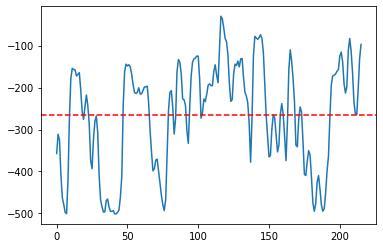

In [13]:
print(pop_mfccs[0].mean())
ax = sns.lineplot(data=pop_mfccs[0])
ax.axhline(pop_mfccs[0].mean(), ls='--', c='r')

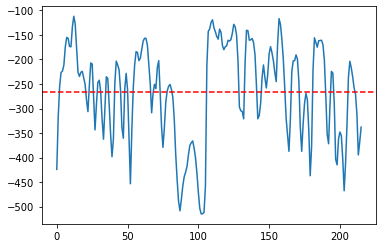

In [14]:
ax = sns.lineplot(data=(mfccs[0]-29))
ax.axhline((mfccs[0]-29).mean(), ls='--', c='r')

In [15]:
# map mom voice to pop voice

psuedo_mfccs = []

for (m, p) in zip(mfccs, pop_mfccs):
    
    diff = p.mean() - m.mean()
    
    psuedo_mfccs.append((m + diff))
    
    print(f"{m.mean()} + {diff} = {p.mean()}")

-236.48455810546875 + -28.782318115234375 = -265.2668762207031
56.515995025634766 + 29.545589447021484 = 86.06158447265625
-14.345332145690918 + 8.846418380737305 = -5.498913764953613
30.02194595336914 + 10.908409118652344 = 40.930355072021484
8.708966255187988 + 18.401615142822266 = 27.110580444335938
-14.067224502563477 + -2.3688125610351562 = -16.436037063598633
-3.451253890991211 + -8.07040786743164 = -11.521661758422852
-17.105621337890625 + 4.458369255065918 = -12.647252082824707
-3.1281213760375977 + -15.746216773986816 = -18.874338150024414
0.18945623934268951 + -1.465929388999939 = -1.2764731645584106
-14.680992126464844 + 12.215986251831055 = -2.46500563621521
-3.6341004371643066 + 0.45697975158691406 = -3.1771206855773926
-2.7676615715026855 + 4.449079513549805 = 1.6814179420471191
-13.152850151062012 + 4.901735305786133 = -8.251114845275879
-9.269195556640625 + 6.777352333068848 = -2.4918432235717773
-11.351520538330078 + 9.929487228393555 = -1.4220335483551025
-8.077842712

In [16]:
psuedo_mfccs = np.array(psuedo_mfccs)
psuedo_mfccs.shape

middle_mfccs = np.array(list(psuedo_mfccs[:10]) + list(mfccs[10:]))
middle_mfccs.shape

(20, 216)

In [17]:
psuedo_y = librosa.feature.inverse.mfcc_to_audio(psuedo_mfccs)

In [18]:
mom_down = librosa.effects.pitch_shift(psuedo_y, sr, -2)
IPython.display.Audio(data=mom_down, rate=sr)

In [19]:
IPython.display.Audio(data=librosa.feature.inverse.mfcc_to_audio(pop_mfccs), rate=sr)

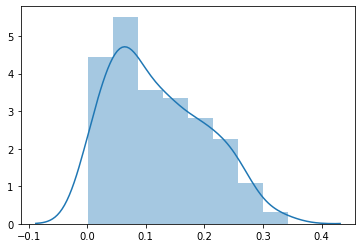

In [20]:
mom_rms = librosa.feature.rms(y)
sns.distplot(mom_rms)

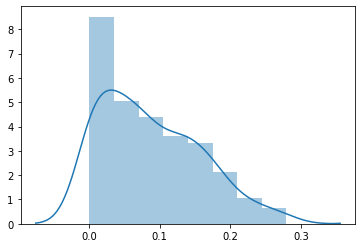

In [21]:
pop_rms = librosa.feature.rms(pop_y)
sns.distplot(pop_rms)

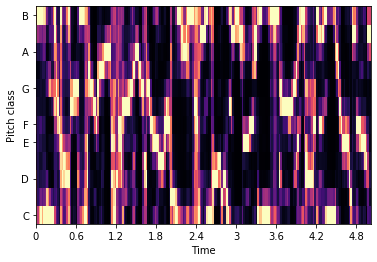

In [22]:
mom_chroma = librosa.feature.chroma_stft(y, sr=sr)
librosa.display.specshow(mom_chroma, y_axis='chroma', x_axis='time')

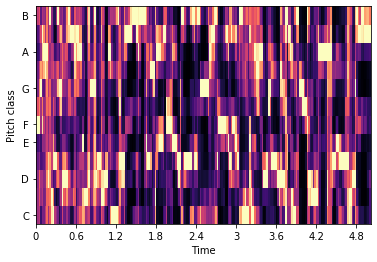

In [23]:
pop_chroma = librosa.feature.chroma_stft(pop_y, sr=sr)
librosa.display.specshow(pop_chroma, y_axis='chroma', x_axis='time')